# Projet IA -- clustering

In [23]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn import metrics
from IPython.core.display import Image, display
from scipy import stats
%matplotlib inline
np.random.seed(10)
random.seed(10)

from sklearn import preprocessing # to scale data

## Data import

In [24]:
df = pds.read_csv('./Data/Data.txt', sep="\t") # load a pandas dataframe from csv

df.head()
#df.tail()

,Time,Time Code,Country Name,Country Code,"Annual freshwater withdrawals, total (billion cubic meters) [ER.H2O.FWTL.K3]","Children out of school, primary [SE.PRM.UNER]",CO2 emissions (kt) [EN.ATM.CO2E.KT],"Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]","Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]","Population, total [SP.POP.TOTL]",Rural population (% of total population) [SP.RUR.TOTL.ZS],Surface area (sq. km) [AG.SRF.TOTL.K2],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],Urban population [SP.URB.TOTL],Women who believe a husband is justified in beating his wife when she refuses sex with him (%) [SG.VAW.REFU.ZS]
0,2013,YR2013,Afghanistan,AFG,NaN,NaN,10014.577,NaN,NaN,62.494,50.968831,31731688.0,75.627,652860.0,NaN,7733964.0,NaN
1,2013,YR2013,Albania,ALB,NaN,10957.0,5064.127,0.00000,0.0,77.702,15.635917,2895092.0,44.613,28750.0,NaN,1603505.0,NaN
2,2013,YR2013,Algeria,DZA,NaN,NaN,134465.223,99.44899,0.0,75.418,31.009854,38338562.0,30.424,2381740.0,NaN,26674438.0,NaN
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,3.457885,55307.0,12.652,200.0,NaN,48310.0,NaN
4,2013,YR2013,Andorra,AND,NaN,NaN,476.710,NaN,NaN,NaN,10.942684,80788.0,11.463,470.0,NaN,71527.0,NaN


# Data description

Les données rassemblent trois grands types de variables : <br>
- Des données environnementales (Ex  : production de polluants, production d'énergies verte ...)
- Des données sociologiques (Ex : Accès à l'éducation , Violoences faites aux femmes ...)
- Des données démographiques fondamentales (Ex : Espérance de vie , Population totale ...)

## Description des variables

* Colonne n°1 : Time => Année de l'étude
* Colonne n°2 : Time code
* Colonne n°3 : Contry name => pays étudiés
* Colonne n°4 : Country code


* Colonne n°5 : Annual freshwater withdrawals, total (billion cubic meters) <br>
    Quantité total d'eau douce consonmmée en millions de mètre cube. Cette métrique comprend l'ensemble des utilisations dues à des activités domestiques, industrielles où agricole. Elle soustrait les perte dues à l'évaporation. Enfin elle comprend l'eau produite par désalinisation. 

* Colonne n°6 : Children out of school, primary <br>
Nombre d'enfants de l'âge de l'école du primaire non scolarisés

![Title](Children_Out_of_primary_school.png "Nombre d'enfants  (en million )d'âge du primaire non scolarisés entre 1970 et 2017")

* Colonne n°7 : CO2 emissions (kt) <br>
Emissin en CO2 en kilotonnes

![Title](EmissionCO22014.png)
*Rmq : On pourrait considérer cette variable en fonction du nombre total d'habitant par pays?*

* Colonne n°8 : Electricity production from oil, gas and coal sources (% of total) <br>
Pourcentage d'électricité produite via des ressources fossiles par rapport à la production totale d'électricité (données mondiales 2015)

![Title](Electricite_fossile2015.png)


* Colonne n°9 : Electricity production from renewable sources, excluding hydroelectric (% of total)
![Title](Electricite_verte_sauf_hydro_2015.png)

*Rmq : étonnante répartion, la production d'électricité verte ne semble pas liée au PIB (à démontrer)?*

* Colonne n°9 : Life expectancy at birth, total (years) 

* Colonne n°10 : PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) <br>
**Definition**: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.
https://www.indexmundi.com/facts/indicators/EN.ATM.PM25.MC.M3
![Title](P.M.252016png.png)

*Rmq :Comment démontrer que la vie est injuste Rapport entre taux d'émisson et les Pm2.5 par pays *

* Colonne n°10 : Population, total 
* Colonne n°11 : Surface area (sq. km) 
* Colonne n°12 : Total greenhouse gas emissions (kt of CO2 equivalent) 
*Rmq : Cette dernière variable est peut etre redondante avec le taux d'émission de CO2*
* Colonne n°13 : Urban population 
![Title](Poppulation_Urbaine_1960_2017.png)

*Rmq : quelle horrible exponentielle !*

* Colonne n°14 : Women who believe a husband is justified in beating his wife when she refuses sex with him (%) 

In [ ]:
*rmq : Je pense qu il faudrait inclure le PIB meme si ce nest pas un indice par excellence. Ceci permettrait
    de creer des variables derivees comme le taux demisssion de poluants en fct de la ichesse produite, ou encore
    la production denergie verte par rapport au PiB (sur ceci on pourrait avoir des resultats surprenants). *

## Data cleaning

## Rename columns

In [13]:
df  = df.rename(index=str, columns={"Annual freshwater withdrawals, total (billion cubic meters) [ER.H2O.FWTL.K3]": "Annual freshwater withdrawals", "Children out of school, primary [SE.PRM.UNER]": "Children out of primary school", "CO2 emissions (kt) [EN.ATM.CO2E.KT]": "CO2 emissions (kt)", "Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]":"Electricity production from oil, gas and coal sources (% of total) ", "Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]": "Electricity production from renewable sources, excluding hydroelectric (% of total)", "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]":"Life expectancy at birth", "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]":"PM2.5 air pollution","Population, total [SP.POP.TOTL]":"Population total" , "Rural population (% of total population) [SP.RUR.TOTL.ZS]": "Rural population (% of total )", "Surface area (sq. km) [AG.SRF.TOTL.K2]	":"Surface area (sq. km)", "Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]": "Total greenhouse gas emissions (kt of CO2 equivalent) ","Urban population [SP.URB.TOTL]":"Urban population", "Women who believe a husband is justified in beating his wife when she refuses sex with him (%) [SG.VAW.REFU.ZS]":"Women who believe a husband is justified in beating his wife when she refuses sex with him (%)"  })

In [14]:
df.head()

,Time,Time Code,Country Name,Country Code,Annual freshwater withdrawals,Children out of primary school,CO2 emissions (kt),"Electricity production from oil, gas and coal sources (% of total)","Electricity production from renewable sources, excluding hydroelectric (% of total)",Life expectancy at birth,PM2.5 air pollution,Population total,Rural population (% of total ),Surface area (sq. km) [AG.SRF.TOTL.K2],Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Women who believe a husband is justified in beating his wife when she refuses sex with him (%)
0,2013,YR2013,Afghanistan,AFG,NaN,NaN,10014.577,NaN,NaN,62.494,50.968831,31731688.0,75.627,652860.0,NaN,7733964.0,NaN
1,2013,YR2013,Albania,ALB,NaN,10957.0,5064.127,0.00000,0.0,77.702,15.635917,2895092.0,44.613,28750.0,NaN,1603505.0,NaN
2,2013,YR2013,Algeria,DZA,NaN,NaN,134465.223,99.44899,0.0,75.418,31.009854,38338562.0,30.424,2381740.0,NaN,26674438.0,NaN
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,3.457885,55307.0,12.652,200.0,NaN,48310.0,NaN
4,2013,YR2013,Andorra,AND,NaN,NaN,476.710,NaN,NaN,NaN,10.942684,80788.0,11.463,470.0,NaN,71527.0,NaN


### Column cleaning

In [4]:
df.count() # Compte les non NaN par colonne

Time                                                                                                               217
Time Code                                                                                                          217
Country Name                                                                                                       217
Country Code                                                                                                       217
Annual freshwater withdrawals, total (billion cubic meters) [ER.H2O.FWTL.K3]                                        16
Children out of school, primary [SE.PRM.UNER]                                                                      125
CO2 emissions (kt) [EN.ATM.CO2E.KT]                                                                                206
Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]                                142
Electricity production from renewable sources, e

##### Les colonnes suivantes sont à supprimer (trop de NaN) : 
##### Annual freshwater, Total greenhouse gas emission, Women who believe...

In [5]:
filtered_col_df = df.drop(['Annual freshwater withdrawals, total (billion cubic meters) [ER.H2O.FWTL.K3]'],axis=1)
filtered_col_df = filtered_col_df.drop(['Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]'],axis=1)
filtered_col_df = filtered_col_df.drop(['Women who believe a husband is justified in beating his wife when she refuses sex with him (%) [SG.VAW.REFU.ZS]'],axis=1)

filtered_col_df.head()

,Time,Time Code,Country Name,Country Code,"Children out of school, primary [SE.PRM.UNER]",CO2 emissions (kt) [EN.ATM.CO2E.KT],"Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]","Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]","Population, total [SP.POP.TOTL]",Rural population (% of total population) [SP.RUR.TOTL.ZS],Surface area (sq. km) [AG.SRF.TOTL.K2],Urban population [SP.URB.TOTL]
0,2013,YR2013,Afghanistan,AFG,NaN,10014.577,NaN,NaN,62.494,50.968831,31731688.0,75.627,652860.0,7733964.0
1,2013,YR2013,Albania,ALB,10957.0,5064.127,0.00000,0.0,77.702,15.635917,2895092.0,44.613,28750.0,1603505.0
2,2013,YR2013,Algeria,DZA,NaN,134465.223,99.44899,0.0,75.418,31.009854,38338562.0,30.424,2381740.0,26674438.0
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,3.457885,55307.0,12.652,200.0,48310.0
4,2013,YR2013,Andorra,AND,NaN,476.710,NaN,NaN,NaN,10.942684,80788.0,11.463,470.0,71527.0


In [6]:
filtered_col_df.isna().sum(axis=0)

Time                                                                                                     0
Time Code                                                                                                0
Country Name                                                                                             0
Country Code                                                                                             0
Children out of school, primary [SE.PRM.UNER]                                                           92
CO2 emissions (kt) [EN.ATM.CO2E.KT]                                                                     11
Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]                     75
Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]    76
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                18
PM2.5 air pollution, mean annual expo

### Rows cleaning

In [8]:
filtered_df = filtered_col_df.dropna() # On enlève toutes les lignes qui contiennent des NA
# On pourra éventuellement faire un filtre différent selon les attributs conservés dans l'analyse finale

filtered_df.tail()

,Time,Time Code,Country Name,Country Code,"Children out of school, primary [SE.PRM.UNER]",CO2 emissions (kt) [EN.ATM.CO2E.KT],"Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]","Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]","Population, total [SP.POP.TOTL]",Rural population (% of total population) [SP.RUR.TOTL.ZS],Surface area (sq. km) [AG.SRF.TOTL.K2],Urban population [SP.URB.TOTL]
210,2013,YR2013,"Venezuela, RB",VEN,244940.0,183922.052,32.165476,0.000000,74.035,24.765075,30317848.0,11.867,912050.0,26720029.0
211,2013,YR2013,Vietnam,VNM,127071.0,147230.050,58.337998,0.115950,75.663,27.815889,91497725.0,67.571,330972.0,29671797.0
214,2013,YR2013,"Yemen, Rep.",YEM,599564.0,25496.651,100.000000,0.000000,64.291,59.399450,25576322.0,66.441,527970.0,8583158.0
215,2013,YR2013,Zambia,ZMB,363385.0,3956.693,0.142857,0.000000,59.982,27.650733,15153210.0,59.135,752610.0,6192359.0
216,2013,YR2013,Zimbabwe,ZWE,398579.0,11675.728,46.060606,1.734587,58.053,23.448376,15054506.0,67.346,390760.0,4915898.0


In [22]:
filtered_df.isna().sum(axis=0)

Time                                                                                                    0
Time Code                                                                                               0
Country Name                                                                                            0
Country Code                                                                                            0
Children out of school, primary [SE.PRM.UNER]                                                           0
CO2 emissions (kt) [EN.ATM.CO2E.KT]                                                                     0
Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]                     0
Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]    0
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                0
PM2.5 air pollution, mean annual exposure (mic

In [23]:
filtered_df.count(axis=0)
# Il reste 96 pays dans le df

Time                                                                                                    96
Time Code                                                                                               96
Country Name                                                                                            96
Country Code                                                                                            96
Children out of school, primary [SE.PRM.UNER]                                                           96
CO2 emissions (kt) [EN.ATM.CO2E.KT]                                                                     96
Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]                     96
Electricity production from renewable sources, excluding hydroelectric (% of total) [EG.ELC.RNWX.ZS]    96
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                96
PM2.5 air pollution, mean annual expo

## K-means

### Vision d'ensemble des données

(0, 200000000.0)

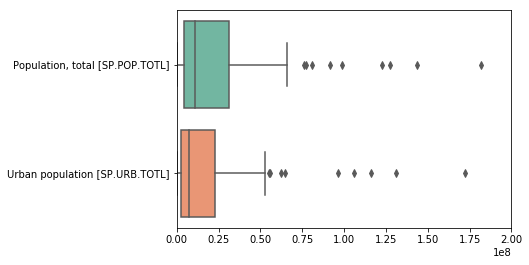

In [45]:
# Pop data
boxplot_df=filtered_df.iloc[:,4:]

boxplot_pop=boxplot_df[['Population, total [SP.POP.TOTL]','Urban population [SP.URB.TOTL]']]

# Pb : Rural pop is a percentage
# A reprendre avec Data2/Data2

ax = sns.boxplot(data=boxplot_pop, orient="h", palette="Set2")
ax.set_xlim([0,2e8])

## DBSCAN